# Calculo de Transformadas Rapidas de Fourier con SciPy

## Transformadas discretas de Fourier 1-D

Las transformadas pueden calcularse mediante fft y ifft, respectivamente, como se muestra en el siguiente ejemplo.  
La FFT y [k] de longitud de la secuencia x[n] que definiremos.

Estas transformaciones pueden calcularse mediante fft y ifft, respectivamente, como se muestra en el siguiente ejemplo.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy import fft, ifft

In [3]:
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
y = fft.fft(x)
y

array([ 4.5       -0.j        ,  2.08155948-1.65109876j,
       -1.83155948+1.60822041j, -1.83155948-1.60822041j,
        2.08155948+1.65109876j])

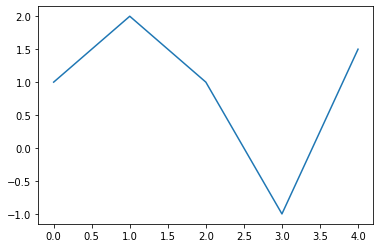

In [4]:
plt.plot(x)

In [5]:
print(y)

[ 4.5       -0.j          2.08155948-1.65109876j -1.83155948+1.60822041j
 -1.83155948-1.60822041j  2.08155948+1.65109876j]


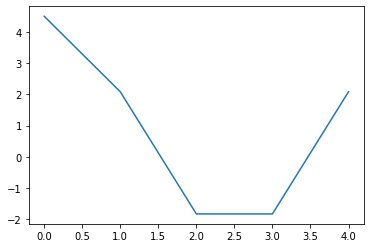

In [6]:
plt.plot(y.real)

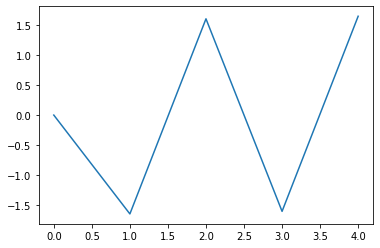

In [7]:
plt.plot(y.imag)

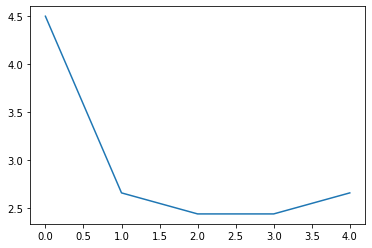

In [8]:
plt.plot(abs(y))

In [9]:
yinv = fft.ifft(y)
print(yinv)
print(yinv.real)
print(yinv.imag)

[ 1. +0.j  2. +0.j  1. +0.j -1. +0.j  1.5+0.j]
[ 1.   2.   1.  -1.   1.5]
[0. 0. 0. 0. 0.]


### Ejemplo de calculo de FFT de la suma de dos funciones senos

In [10]:
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.01
F1 = 50.0 # Frecuencia
F2 = 80.0 # Frecuencia
x = np.linspace(0.0, N * T, N)
sen1 = np.sin(F1 * 2.0 * np.pi * x)
sen2 = 0.5 * np.sin(F2 * 2.0 *np.pi * x)
print(N * T)

0.7499906251171861


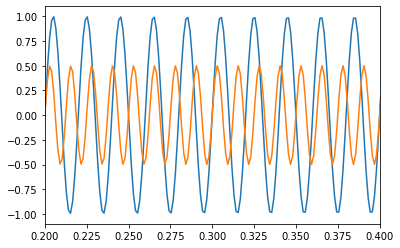

In [11]:
plt.xlim(0.2, 0.4)
plt.plot(x, sen1)
plt.plot(x, sen2)

In [12]:
y = sen1 + sen2

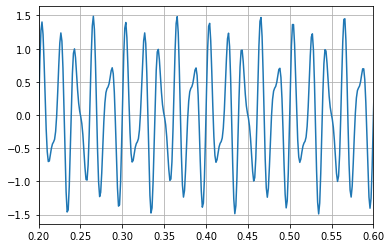

In [13]:
plt.xlim(0.2, 0.6)
plt.plot(x, y)
plt.grid()
plt.show()

In [14]:
yf = fft.fft(y)
xf = np.linspace(0.0, 1.0/(2.0 * T), N//2)

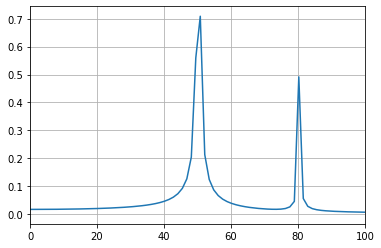

In [15]:
plt.xlim(0.0, 100.0)
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

La senal de entrada FFT esta inherentemente truncada. Este truncamiento puede modelarse como una multiplicacion de una senal infinita con una funcion de ventana rectangular. En el dominio espectral, esta multiplicacion se convierte en convulcion del espectro de senal con el espectro de funcion de ventana, siendo de forma *sin(x)/x*.

Esta convulcion es la causa de un efecto llamado fuga espectral (ver [WPW]).

La ventana de la senal con una funcion de ventana dedicada ayuda a mitigar la fuga espectral.

El siguiente ejemplo utiliza una ventana Blackman de scipy.signal y muestra el efecto de la ventana (el componente cero de la FFT se ha truncado con fines ilustrativos).

**(La ventana Blackman es un cono formado mediante el uso de los primeros tres terminos de una suma de cosenos. Fue disenado para tener cerca de la minima fuga posible. La mayoria de las referencias a la ventana Blackman provienen de la literatura de procesamiento de senales, donde se utiliza como una de las muchas funciones de ventanas para suavizar los valores. Tambien se conoce como apodizacion (que significa "quitar el pie", es decir, suavizar las discontinuidades al principio y al final de la senal muestreada) o funcion de disminucion gradual).**

In [17]:
# Number of sample points
N = 600
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(F1 * 2.0 * np.pi * x) + 0.5 * np.sin(F2 * 2.0 * np.pi * x)
yf = fft.fft(y)

In [18]:
# Importamos blackman
from scipy.signal import blackman

In [19]:
w = blackman(N)
ywf = fft.fft(y * w)
xf = np.linspace(0.0, 1.0/(2.0 * T), N//2)

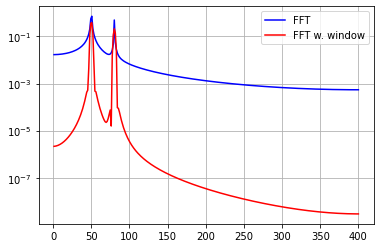

In [20]:
plt.semilogy(xf[1:N//2], 2.0 / N * np.abs(yf[1:N//2]), '-b')
plt.semilogy(xf[1:N//2], 2.0 / N * np.abs(ywf[1:N//2]), '-r')
plt.legend(['FFT', 'FFT w. window'])
plt.grid()
plt.show()

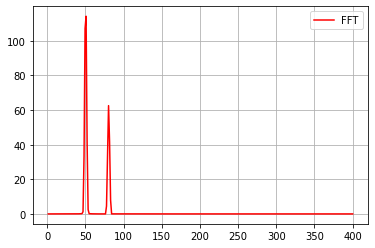

In [22]:
plt.plot(xf[1:N//2], np.abs(ywf[1:N//2]), '-r')
plt.legend(['FFT', 'FFT w. window'])
plt.grid()
plt.show()

## Transformacion Coseno Discreta

SciPy proporciona un DCT con la funcion ```dct``` y un IDCT correspondiente con la funcion ```idct```.  

El DCT exhibe la "propiedad de compactacion de energia", lo que significa que para muchas senales solo los primeros coeficientes DCT tienen una magnitud significativa. Poner a cero los otros coeficientes conduce a un pequeno error de reconstruccion, un hecho que se explota en la compresion de senal con perdida (por ejemplo, compresion JPEG).  

El siguiente ejemplo muestra una senal x y dos reconstrucciones ($x_{20}$ y $x_{15}$) de los coeficientes DCT de la senal.  

La senal se reconstruye a partir de los primeros 20 coeficientes DCT, $x_15$ se reconstruye a partir de los primeros 15 coeficientes DCT. Se puede ver que el error relativo de usar 20 coeficientes sigue siendo muy pequeno ($\sim 0.1\%$), pero proporciona una tasa de compresion de cinco veces.

In [23]:
# from scipy import dct, idct
from scipy.fftpack import dct, idct

In [24]:
N = 100
t = np.linspace(0, 20, N)
x = np.exp(-t / 3.0) * np.cos(2.0 * t)
y = dct(x, norm = 'ortho')
window = np.zeros(N)
window[:20] = 1
xr = idct(y * window, norm = 'ortho')
sum(abs(x-xr)**2) / sum(abs(x)**2)

0.001090140225700517

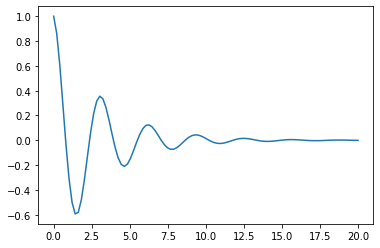

In [25]:
plt.plot(t, x)

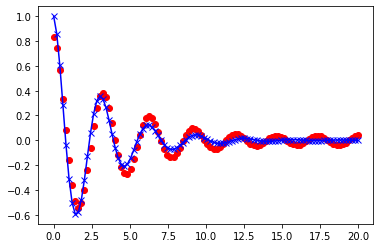

In [26]:
window = np.zeros(N)
window[:15] = 1
xr15 = idct(y * window, norm = 'ortho')
xr15none = idct(y * window)
window[:20] = 1
xr20 = idct(y * window, norm = 'ortho')
sum(abs(x - xr)**2) / sum(abs(x)**2)

plt.plot(t, xr15, 'ro')
plt.plot(t, x, '-bx')

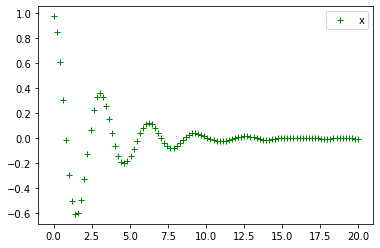

In [27]:
plt.plot(t, xr, 'g+')
plt.legend(['x', '$x_{20}$', '$x_{15}$'])
plt.show()